In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [5]:
from keras.datasets import mnist

In [6]:
mnist

<module 'keras.datasets.mnist' from 'C:\\Users\\Abirk\\anaconda3\\lib\\site-packages\\keras\\datasets\\mnist.py'>

In [14]:
(X_train_origin, Y_train_origin), (X_test_origin, Y_test_origin) = mnist.load_data()

In [9]:
print(X_train_origin.shape)
print(Y_train_origin.shape)
print(X_test_origin.shape)
print(Y_test_origin.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


y = 4
x = [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 125 254
  210  89   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 132  47   0   0   0   0   0   7 243 253
  253 191   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  17  95 237 232   5   0   0   0   0   7 253 253
  253 191   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  56 253 253 253   6   0   0 

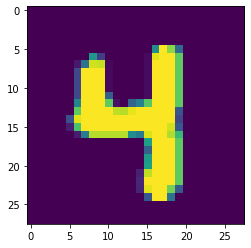

In [10]:
# Example of a picture
index = 58
plt.imshow(X_train_origin[index])
print ("y = " + str(Y_train_origin[index]))
print ("x = " + str(X_train_origin[index]))

In [15]:
# expand input datas by 1 at the end. to use perfect stride.. 

X_train_origin_expanded = np.expand_dims(X_train_origin, axis = 3)
X_test_origin_expanded = np.expand_dims(X_test_origin, axis = 3)

print(X_train_origin.shape)
print(X_test_origin.shape)
print("\n")
print(X_train_origin_expanded.shape)
print(X_test_origin_expanded.shape)

(60000, 28, 28)
(10000, 28, 28)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [16]:
# create an image data generator

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest'
                )

validation_datagen = ImageDataGenerator(
                        rescale=1 / 255
                     )

In [17]:
# model

model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (3,3), activation='sigmoid', input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(32, (3,3), activation='sigmoid'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='sigmoid'),
            tf.keras.layers.Dense(26, activation='softmax')
         ])

In [18]:
#compile model

model.compile( 
                optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
            )

In [19]:
#configure generators

train_gen = train_datagen.flow(
    X_train_origin_expanded,
    Y_train_origin,
    batch_size=10
)

val_gen = validation_datagen.flow(
    X_test_origin_expanded,
    Y_test_origin,
    batch_size=10
)


In [20]:
#train model

history = model.fit_generator(
    train_gen,
    epochs=2,
    validation_data=val_gen
)

model.evaluate(X_test_origin_expanded, Y_test_origin, verbose=0)

C:\Users\Abirk\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
6000/6000 [==============================] - 262s 42ms/step - loss: 1.9840 - accuracy: 0.2842 - val_loss: 1.1988 - val_accuracy: 0.6273
Epoch 2/2
6000/6000 [==============================] - 165s 27ms/step - loss: 1.4140 - accuracy: 0.5189 - val_loss: 0.7048 - val_accuracy: 0.7765


[1.1333372592926025, 0.6353999972343445]

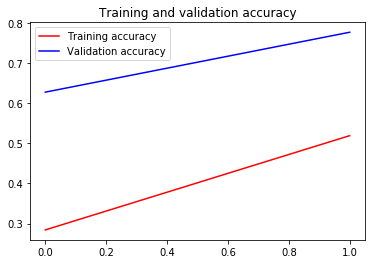

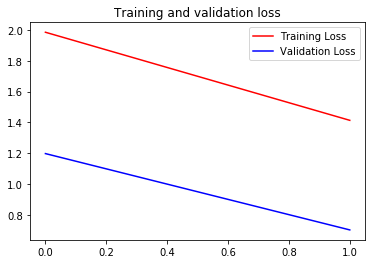

In [21]:
# Plot the chart for accuracy and loss on both training and validation

##------------------accuracy plot ---------------------

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 

loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')

plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

##------------------loss plot ---------------------

plt.plot(epochs, loss, 'r', label='Training Loss')

plt.plot(epochs, val_loss, 'b', label='Validation Loss')

plt.title('Training and validation loss')
plt.legend()

plt.show()